In [40]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Reading from CSV File and Storing in Dataframe
X = pd.read_csv('../../Dataset/x_train_all.csv')
y = pd.read_csv('../../Dataset/y_train_all.csv')

In [26]:
#Printing the shapes of the training
print("========================================")
print("Shape of X is  :", X.shape)
print("Shape of y is  :", y.shape)
print("========================================")

Shape of X is  : (9690, 2304)
Shape of y is  : (9690, 1)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [28]:
X_train.shape

(7752, 2304)

In [18]:
y_train.shape

(7752, 1)

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
7053,0.090196,0.090196,0.086275,0.086275,0.090196,0.094118,0.094118,0.090196,0.090196,0.094118,...,0.207843,0.152941,0.101961,0.094118,0.090196,0.086275,0.086275,0.086275,0.082353,0.082353
3506,0.788235,0.447059,0.466667,0.721569,0.839216,0.901961,0.854902,0.823529,0.650980,0.698039,...,0.811765,0.784314,0.913725,0.925490,0.882353,0.847059,0.815686,0.792157,0.788235,0.721569
7371,0.227451,0.211765,0.223529,0.215686,0.239216,0.270588,0.247059,0.219608,0.223529,0.239216,...,0.301961,0.270588,0.243137,0.219608,0.223529,0.211765,0.192157,0.192157,0.196078,0.203922
4515,0.078431,0.078431,0.082353,0.074510,0.070588,0.062745,0.062745,0.062745,0.062745,0.062745,...,0.062745,0.066667,0.070588,0.066667,0.070588,0.074510,0.074510,0.074510,0.062745,0.058824
8942,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [32]:
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("========================================")
print("Accuracy Score is :", accuracy)
print("========================================")


Accuracy Score is : 0.35810113519091846


Text(0.5, 1.0, 'Confusion Matrix')

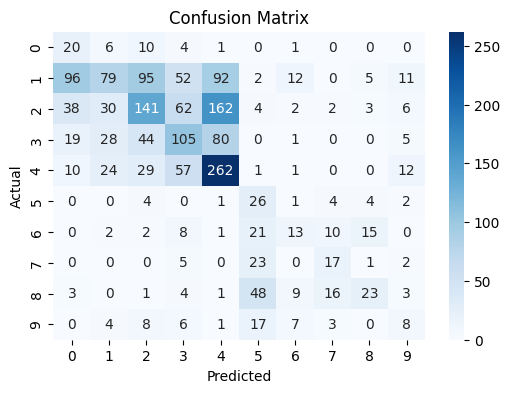

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [41]:
# Compute precision, recall, and F1-score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)


In [42]:
print(f1)

[0.1754386  0.2560778  0.35969388 0.35897436 0.52557673 0.2826087
 0.21848739 0.34       0.28930818 0.15533981]


In [43]:
print(precision)

[0.10752688 0.4566474  0.42215569 0.34653465 0.4359401  0.18309859
 0.27659574 0.32692308 0.45098039 0.16326531]


In [44]:
print(recall)

[0.47619048 0.17792793 0.31333333 0.37234043 0.66161616 0.61904762
 0.18055556 0.35416667 0.21296296 0.14814815]


In [46]:
df = pd.DataFrame({'Precision': precision, 'F1 Score': f1, 'Recall': recall})

In [47]:
df

,Precision,F1 Score,Recall
0,0.107527,0.175439,0.476190
1,0.456647,0.256078,0.177928
2,0.422156,0.359694,0.313333
3,0.346535,0.358974,0.372340
4,0.435940,0.525577,0.661616
5,0.183099,0.282609,0.619048
6,0.276596,0.218487,0.180556
7,0.326923,0.340000,0.354167
8,0.450980,0.289308,0.212963
9,0.163265,0.155340,0.148148


In [49]:
# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.11      0.48      0.18        42
           1       0.46      0.18      0.26       444
           2       0.42      0.31      0.36       450
           3       0.35      0.37      0.36       282
           4       0.44      0.66      0.53       396
           5       0.18      0.62      0.28        42
           6       0.28      0.18      0.22        72
           7       0.33      0.35      0.34        48
           8       0.45      0.21      0.29       108
           9       0.16      0.15      0.16        54

    accuracy                           0.36      1938
   macro avg       0.32      0.35      0.30      1938
weighted avg       0.40      0.36      0.35      1938

